<a href="https://colab.research.google.com/github/jimin0/2023_JUMP_AI/blob/main/%EC%8B%A0%EC%95%BD%EA%B0%9C%EB%B0%9C_preprocessing.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install tqdm

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

train_df = pd.read_csv('/content/drive/MyDrive/2023 신약개발 대회/open (1)/train.csv', encoding='UTF-8')
test_df = pd.read_csv('/content/drive/MyDrive/2023 신약개발 대회/open (1)/test.csv', encoding='UTF-8')
submission_df = pd.read_csv('/content/drive/MyDrive/2023 신약개발 대회/open (1)/sample_submission.csv', encoding='UTF-8')

In [ ]:
train_df.head()

,id,SMILES,MLM,HLM,AlogP,Molecular_Weight,Num_H_Acceptors,Num_H_Donors,Num_RotatableBonds,LogD,Molecular_PolarSurfaceArea
0,TRAIN_0000,CCOc1ccc(CNC(=O)c2cc(-c3sc(C)nc3C)n[nH]2)cc1OCC,26.010,50.680,3.259,400.495,5,2,8,3.259,117.37
1,TRAIN_0001,Cc1nc(C)c(CN2CC(C)C(=O)Nc3ccccc32)s1,29.270,50.590,2.169,301.407,2,1,2,2.172,73.47
2,TRAIN_0002,CCCN1CCN(c2nn3nnnc3c3ccccc23)CC1,5.586,80.892,1.593,297.358,5,0,3,1.585,62.45
3,TRAIN_0003,Cc1ccc(-c2ccc(-n3nc(C)c(S(=O)(=O)N4CCN(C5CCCCC...,5.710,2.000,4.771,494.652,6,0,5,3.475,92.60
4,TRAIN_0004,Cc1ccc2c(c1)N(C(=O)c1ccncc1)CC(C)O2,93.270,99.990,2.335,268.310,3,0,1,2.337,42.43


In [ ]:
test_df.head()

,id,SMILES,AlogP,Molecular_Weight,Num_H_Acceptors,Num_H_Donors,Num_RotatableBonds,LogD,Molecular_PolarSurfaceArea
0,TEST_000,CC(C)Nc1ccnc(N2CCN(Cc3cccs3)C(CCO)C2)n1,2.641,361.505,4,2,7,2.635,92.76
1,TEST_001,COc1cc(=O)n(-c2ccccc2)cc1C(=O)N1CCC2(CC1)OCCO2,0.585,370.399,5,0,3,0.585,68.31
2,TEST_002,Cc1cccc(NC(=N)/N=c2\nc(O)c(Cc3ccccc3)c(C)[nH]2)c1,4.276,347.414,4,4,5,4.290,92.86
3,TEST_003,O=C(c1nc2ncccn2n1)N1CCCn2cc(-c3ccccc3)nc21,1.795,345.358,5,0,2,1.795,81.21
4,TEST_004,CCN1CCN(C(=O)c2cc3c(=O)n4cc(C)ccc4nc3n2C)CC1,1.219,353.418,4,0,2,0.169,61.15


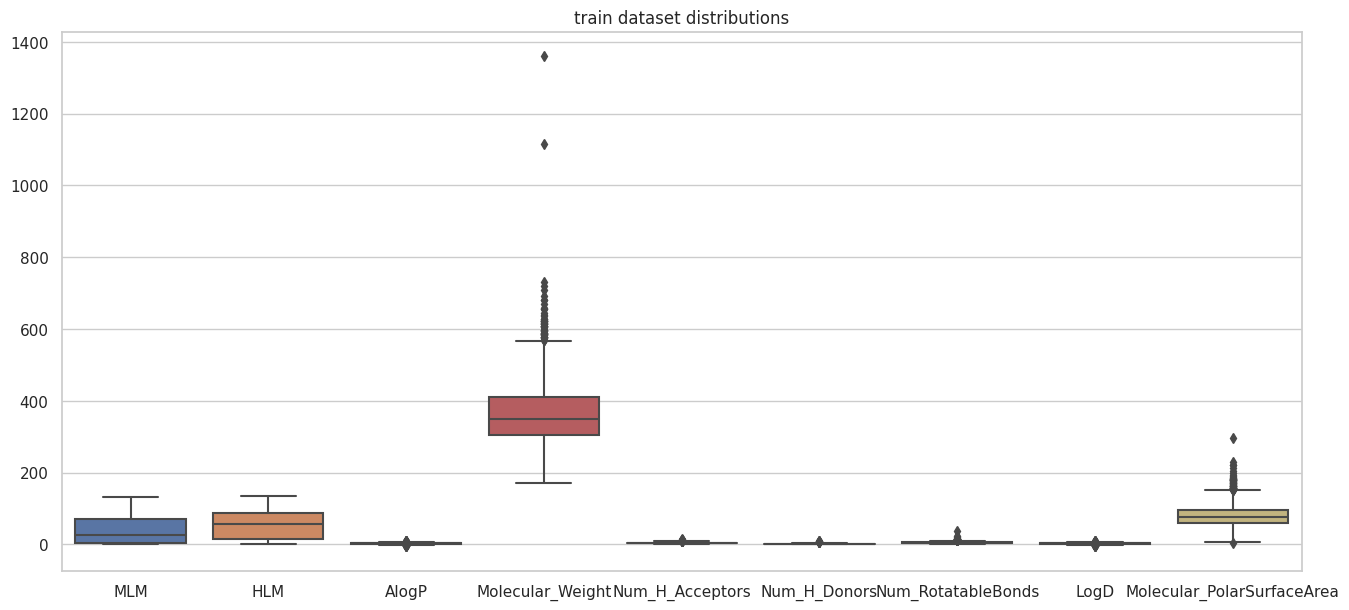

In [ ]:
sns.set_theme(style='whitegrid')
plt.figure(figsize=(16, 7))
plt.title('train dataset distributions')
ax = sns.boxplot(data=train_df.iloc[:, 2:], order=list(train_df.columns[2:]))

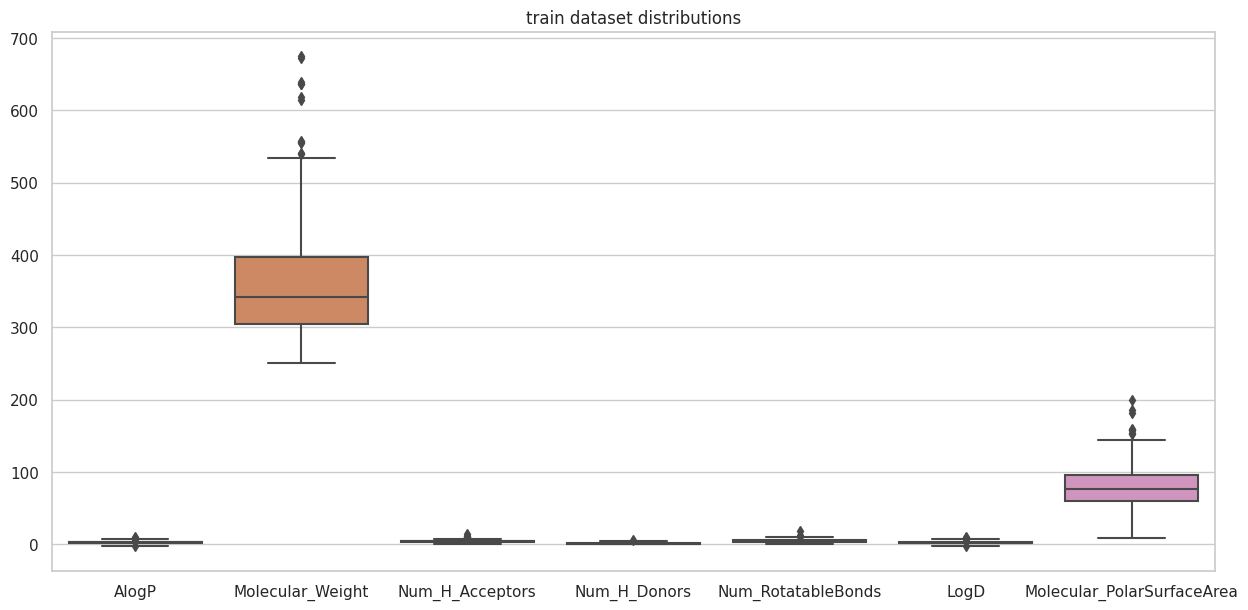

In [ ]:
plt.figure(figsize=(15, 7))
plt.title('train dataset distributions')
ax = sns.boxplot(data=test_df.iloc[:, 2:], order=list(test_df.columns[2:]))

<Axes: title={'center': 'Mol PolarSurfaceArea Distribution'}, xlabel='Molecular_PolarSurfaceArea', ylabel='Count'>

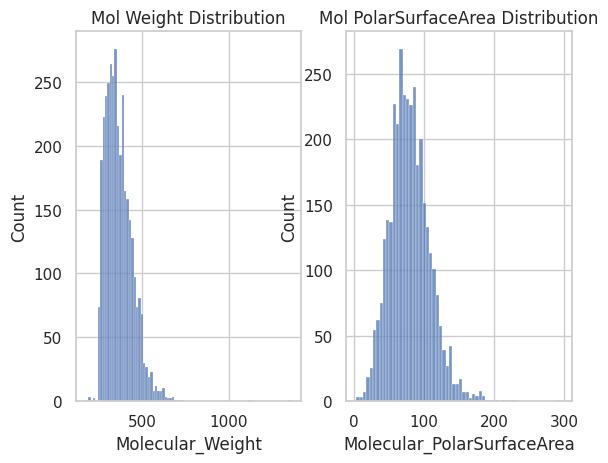

In [ ]:
# scaling전 distribution확인
fig, ax = plt.subplots(ncols=2)
plt.title('train histogram')
ax[0].set_title('Mol Weight Distribution')
ax[1].set_title('Mol PolarSurfaceArea Distribution')
sns.histplot(train_df['Molecular_Weight'], ax=ax[0])
sns.histplot(train_df['Molecular_PolarSurfaceArea'], ax=ax[1])

#### scaling을 하지 않았기 때문에 molecular_weight외에 1개 column의 편차가 큰 것을 알 수 있음
따라서 로그 스케일링을 적용해줄것
(대회에서 outlier값은 없다고 공지를 했기 때문에 drop은 생략했다.)

In [ ]:
from scipy.stats import skew
# 그래프의 분포의 대칭성 확인
# skewness값이 1 or -1을 넘는다면 log scaling적용 넘지 않으면 MinMaxscaling적용
# 예측 변수와 목표 변수가 정규 분포를 따를 때 더 신뢰할 수 있는 예측이 이루어지기 때문
train_skewness_MW = skew(train_df['Molecular_Weight'])
train_skewness_MP = skew(train_df['Molecular_PolarSurfaceArea'])

test_skewness_MW = skew(test_df['Molecular_Weight'])
test_skewness_MP = skew(test_df['Molecular_PolarSurfaceArea'])

print('train_skewness_MW: {0} train_skewness_MP: {1}'.format(train_skewness_MW, train_skewness_MP))
print('test_skewness_MW: {0} test_skewness_MP: {1}'.format(test_skewness_MW, test_skewness_MP))

train_skewness_MW: 1.5765825636939301 train_skewness_MP: 0.7316909395606567
test_skewness_MW: 1.1303255507312893 test_skewness_MP: 0.5957585682902687


#### Molecular_Weight의 경우는 skewness가 1을 넘었기 때문에 log scaling을 Molecular_PolarSurfaceArea의 경우는
####skewness가 1의 값을 넘지 않았기 때문에 MinMaxscaling을 적용시켜줄 생각이다.

In [ ]:
from sklearn.preprocessing import MinMaxScaler

train_df['Molecular_Weight'] = np.log1p(train_df['Molecular_Weight'])
test_df['Molecular_Weight'] = np.log1p(test_df['Molecular_Weight'])

scaler = MinMaxScaler()
train_df['Molecular_PolarSurfaceArea'] = scaler.fit_transform(train_df[['Molecular_PolarSurfaceArea']])
test_df['Molecular_PolarSurfaceArea'] = scaler.transform(test_df[['Molecular_PolarSurfaceArea']])

# 변환 후에 skewness측정
train_skewness_MW = skew(train_df['Molecular_Weight'])
train_skewness_MP = skew(train_df['Molecular_PolarSurfaceArea'])

test_skewness_MW = skew(test_df['Molecular_Weight'])
test_skewness_MP = skew(test_df['Molecular_PolarSurfaceArea'])

print('train_skewness_MW: {0} train_skewness_MP: {1}'.format(train_skewness_MW, train_skewness_MP))
print('test_skewness_MW: {0} test_skewness_MP: {1}'.format(test_skewness_MW, test_skewness_MP))

train_skewness_MW: 0.45337320362366895 train_skewness_MP: 0.7316909395606567
test_skewness_MW: 0.5054536998446744 test_skewness_MP: 0.5957585682902692


skewness값이 감소한 것을 확인할 수 있다.

<Axes: title={'center': 'Mol PolarSurfaceArea Distribution'}, xlabel='Molecular_PolarSurfaceArea', ylabel='Count'>

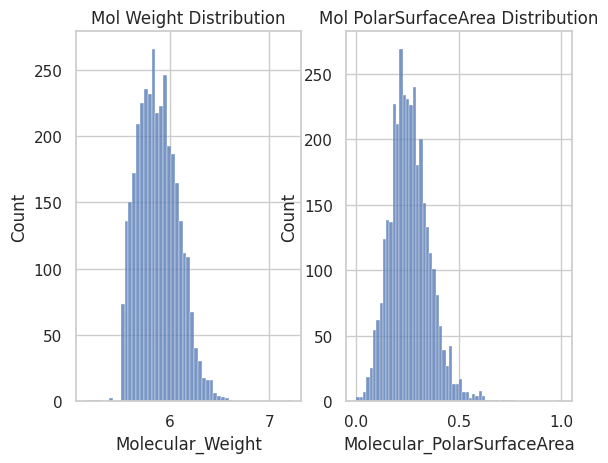

In [ ]:
fig, ax = plt.subplots(ncols=2)
plt.title('train histogram')
ax[0].set_title('Mol Weight Distribution')
ax[1].set_title('Mol PolarSurfaceArea Distribution')
sns.histplot(train_df['Molecular_Weight'], ax=ax[0])
sns.histplot(train_df['Molecular_PolarSurfaceArea'], ax=ax[1])

molecuar weight의 경우 그래프의 중앙쪽으로 median값이 이동한 것을 볼 수 있다.
molecular polarsurfacearea의 경우 minmaxscaling을 미리했기 때문에 scaling과정에는 빼고할것 (할일 늘린것 같기도..)

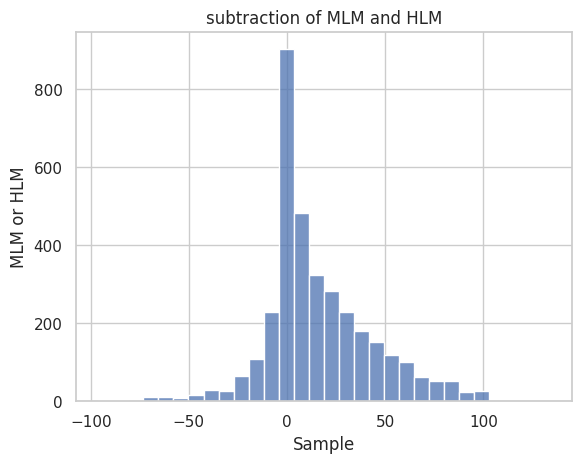

In [ ]:
sns.histplot(train_df['HLM'] - train_df['MLM'], bins=30)
plt.title('subtraction of MLM and HLM')
plt.ylabel('MLM or HLM')
plt.xlabel('Sample')
plt.show()

####target값의 차이는 다양하게 나타났다. 사람과 쥐의 용해도차이가 매우 큰 것도 있기 때문에
#### 사람, 쥐를 target으로하는 model을 따로 만드는 것이 좋을 것 같다.

In [ ]:
# target값이 100이상인 것을 따로 추출하고 그래프를 통해서 비교해보기
unique_train_idx = train_df[(train_df['HLM']>=100) | (train_df['MLM']>=100)].index
common_train_idx = train_df[(train_df['HLM']<100) & (train_df['MLM']<100)].index


### target값의 용해도 특징 추출해보기

100%|██████████| 3/3 [00:02<00:00,  1.44it/s]


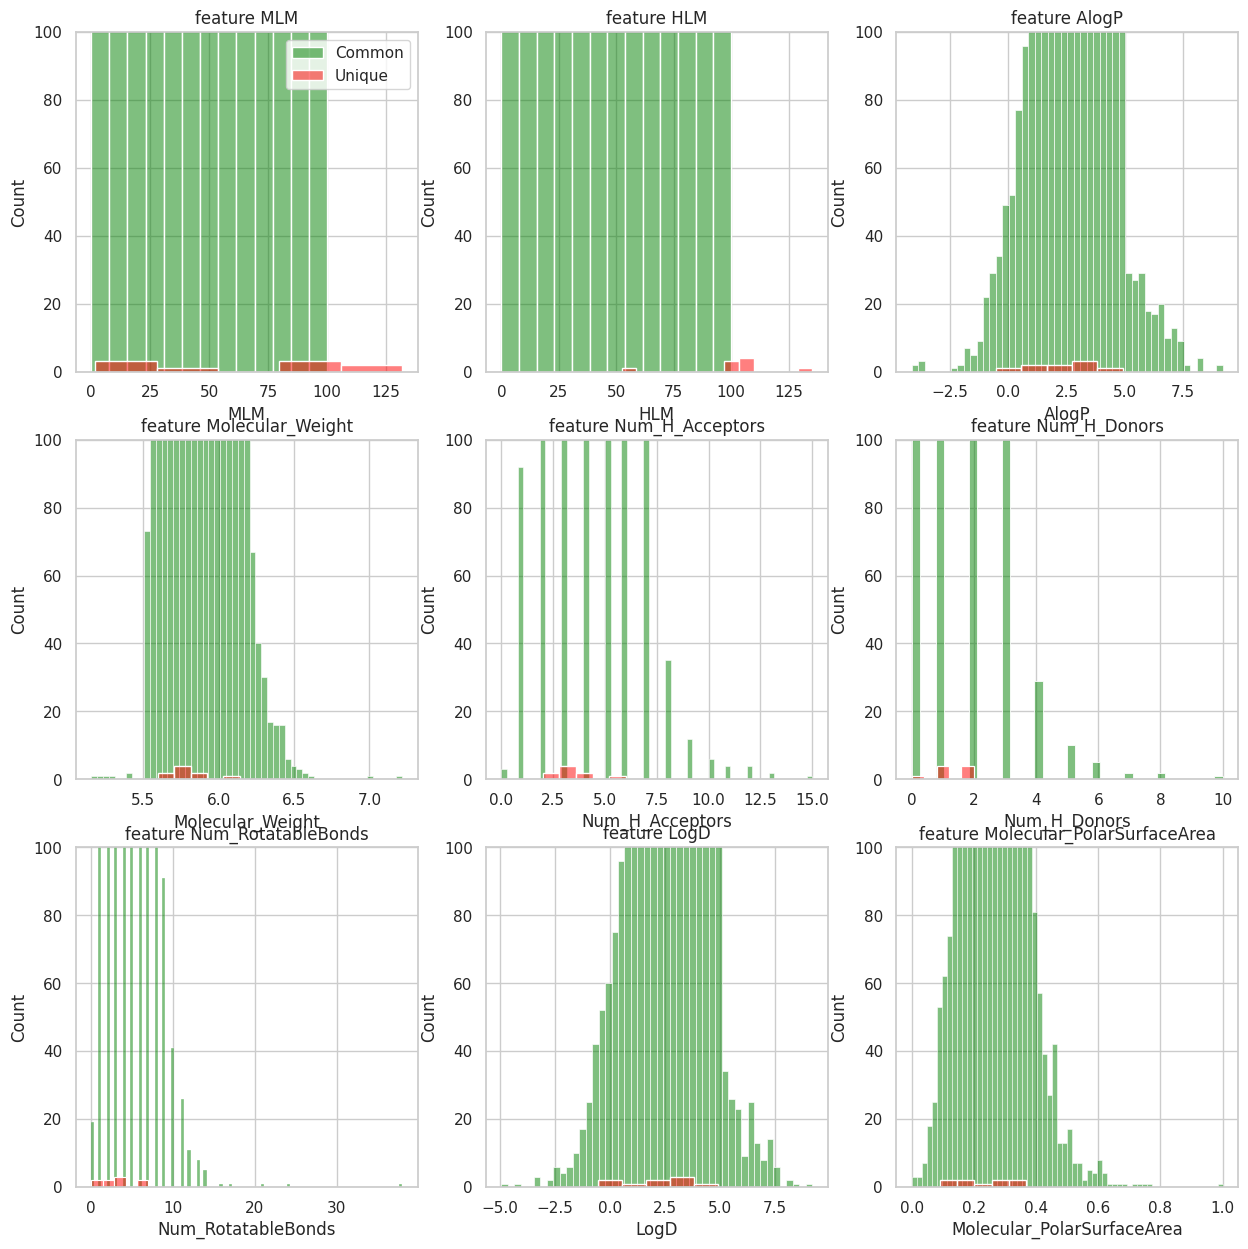

In [ ]:
from tqdm import tqdm

fig, ax = plt.subplots(nrows=3, ncols=3, figsize=(15, 15))
col_list = [col for col in train_df.columns[2:]]

for row in tqdm(range(3)):
    for col in tqdm(range(3)):
        ax[row][col].set_title('feature ' + col_list[(row*3) + col])

        # 첫 번째 히스토그램 (녹색, 투명도 0.5)
        sns.histplot(train_df.loc[common_train_idx, col_list[(row*3) + col]], label='Common', color='green', alpha=0.5, ax=ax[row][col]).set(ylim=(0, 100))

        # 두 번째 히스토그램 (빨간색)
        sns.histplot(train_df.loc[unique_train_idx, col_list[(row*3) + col]], label='Unique', color='red', alpha=0.5, ax=ax[row][col]).set(ylim=(0, 100))

        # 범례 추가
        ax[0][0].legend()

plt.show()

y축의 범위를 100으로 제한했을 때 용해도가 100 이상인 것들의 분포를 좀 더 잘 볼 수 있다.

In [ ]:
# 중복 데이터 제거 후 'HLM' 및 'MLM' 열 값 변경
train_df_no_duplicates = train_df.drop_duplicates(subset=col_list[2:], keep='first')
train_duplicated_groups = train_df[train_df.duplicated(subset=col_list[2:], keep=False)]

for idx, group in train_duplicated_groups.groupby(['HLM', 'MLM']):
    avg_HLM = group['HLM'].mean()
    avg_MLM = group['MLM'].mean()
    train_df_no_duplicates.loc[train_df_no_duplicates['HLM'] == idx[0], 'HLM'] = avg_HLM
    train_df_no_duplicates.loc[train_df_no_duplicates['MLM'] == idx[1], 'MLM'] = avg_MLM

train_dataset에서 target값을 제외한 중복데이터를 제거시켜주고 중복된 데이터의 target값을 해당 데이터의 평균값으로 변경시켜주었다.

In [ ]:
train_df.shape[0] # 중복제거 전 데이터의 개수

3498

In [ ]:
train_df_no_duplicates.shape[0] # 중복제거 후 데이터의 개수

3465

#### heatmap으로 상관관계 분석해보기

<ipython-input-185-eff83d769087>:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(train_df.corr(),vmin=-1,vmax=1,annot=True,linewidths=0.2,cmap='Reds')


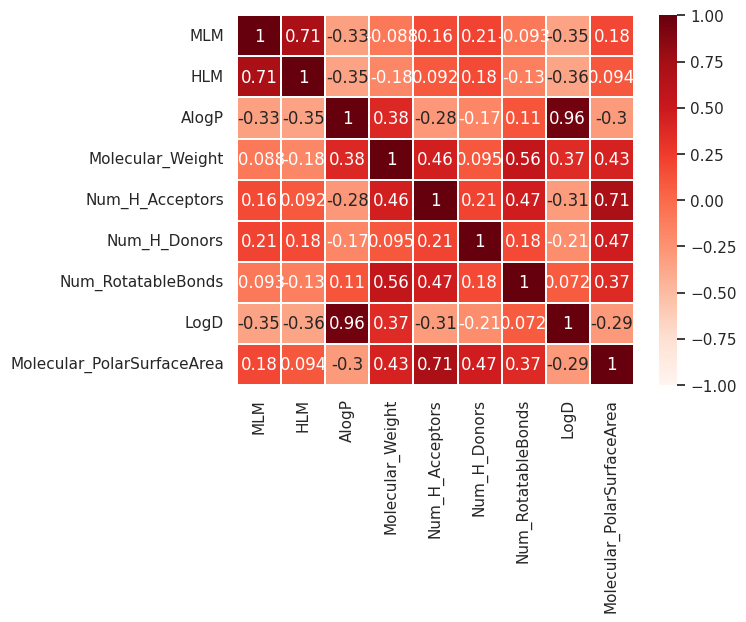

In [ ]:
heatmap_train_df = train_df.drop(columns='SMILES')
sns.heatmap(train_df.corr(),vmin=-1,vmax=1,annot=True,linewidths=0.2,cmap='Reds')
plt.show()

분석결과 target값과 corr값이 작은 column들은 제거를 해보는 것도 좋을 것 같다.

In [ ]:
test_df.head()

,id,SMILES,AlogP,Molecular_Weight,Num_H_Acceptors,Num_H_Donors,Num_RotatableBonds,LogD,Molecular_PolarSurfaceArea
0,TEST_000,CC(C)Nc1ccnc(N2CCN(Cc3cccs3)C(CCO)C2)n1,2.641,361.505,4,2,7,2.635,92.76
1,TEST_001,COc1cc(=O)n(-c2ccccc2)cc1C(=O)N1CCC2(CC1)OCCO2,0.585,370.399,5,0,3,0.585,68.31
2,TEST_002,Cc1cccc(NC(=N)/N=c2\nc(O)c(Cc3ccccc3)c(C)[nH]2)c1,4.276,347.414,4,4,5,4.290,92.86
3,TEST_003,O=C(c1nc2ncccn2n1)N1CCCn2cc(-c3ccccc3)nc21,1.795,345.358,5,0,2,1.795,81.21
4,TEST_004,CCN1CCN(C(=O)c2cc3c(=O)n4cc(C)ccc4nc3n2C)CC1,1.219,353.418,4,0,2,0.169,61.15


In [ ]:
train_df[train_df['SMILES'] == 'CC(C)Nc1ccnc(N2CCN(Cc3cccs3)C(CCO)C2)n1']

,id,SMILES,MLM,HLM,AlogP,Molecular_Weight,Num_H_Acceptors,Num_H_Donors,Num_RotatableBonds,LogD,Molecular_PolarSurfaceArea


In [ ]:
for a, b in enumerate(test_df['SMILES']):
  if len(train_df[train_df['SMILES'] == b])>0:
    print(1)
    break